# Задание №1

Требуется реализовать базовые методы планирования эксперемента: метод наименьших квадратов и метод для решения СЛАУ

Для решения этой задачи мы будем восстанавливать уравнение плоскости по точкам в трёхмерном пространстве. Уравнение задаётся формулой:

</br>
$$ax + by + c = z$$
</br>

где a, b, c - коэф-енты, в свою очередь x, y, z - параметры функции

Требуется найти a, b, c по набору из знгаченией x, y, z. Для этого воспользуемся методом наименьших квадратов, составив уравнение, для вычисления искомых коэ-фов. Уравнение полученное с помощью метода наименьших квадратов:

</br>
$$
\left(\begin{array}{ccc}
\sum x^2 & \sum x * y & \sum x \\
\sum x * y & \sum y^2 & \sum y \\
\sum x & \sum y & \sum 1
\end{array}\right)\left(\begin{array}{l}
a \\
b \\
c
\end{array}\right)=\left(\begin{array}{l}
\sum x * z \\
\sum y * z \\
\sum z
\end{array}\right)
$$
</br>

Для решения СЛАУ будем использовать встроенные способы вычисления с помощью PyTorch

В результате работы программы мы получим коэффициенты a, b, c

In [ ]:
import torch

In [ ]:
x_coef = 2.3
y_coef = 4.4
z_coef = -3.2

# Создание матрицы (матрица задаётся рандомно, чтобы избежать сингулярности)
M = torch.rand((4, 3), dtype=torch.float64)
M[:, 2] = x_coef * M[:, 0] + y_coef * M[:, 1] + z_coef

# Метод наименьших квадратов
x = torch.sum(M[:, 0])
y = torch.sum(M[:, 1])
z = torch.sum(M[:, 2])
xx = torch.sum(M[:, 0] * M[:, 0])
yy = torch.sum(M[:, 1] * M[:, 1])
xy = torch.sum(M[:, 0] * M[:, 1])
xz = torch.sum(M[:, 0] * M[:, 2])
yz = torch.sum(M[:, 1] * M[:, 2])

# Матрица коэффициентов и вектор правых частей
a = torch.tensor([[xx, xy, x], [xy, yy, y], [x, y, 4]])
b = torch.tensor([xz, yz, z])

# Решение СЛАУ
result = torch.linalg.solve(a, b)

print(f"a = {result[0].item()}, b = {result[1].item()}, c = {result[2].item()}")

a = 2.2999999999999963, b = 4.399999999999996, c = -3.199999999999996


# Задание №2

Программно реализовать метод планирования экстремального эксперимента, используя ранее полученные результаты

Перед нами, как и в прошлый раз, стоит задача нахождения коэф-тов уравнения плоскости: a, b, c. Но также теперь нам нужно найти экстремум функции (в нашем случае минимум). Для этого мы будем использовать уравнение заданное формулой:

</br>
$$ax^{2} + by^{2} + c = z$$
</br>

где a, b, c - коэф-енты, в свою очередь x, y, z - параметры функции

Для поиска экстремума будет использован базовый алгоритм градиентного спуска. Градиент будет находится автоматически, на основе встроенных инструментов в тензоры PyTorch (автоматическое дифференцирование). Во время поиска экстремума шаг градиента будет понижаться в зависимости от счётчика цикла

Начальные значения x и y для поиска экстреммума мы будем брать случайным образом. Для x: $[0, 5]$, а для y: $[-5, 5]$

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4130 sha256=d16e28ddef5317e59ec4f62cb33590f1032075955bc908e497b80485b5fe6c2f
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
import numpy as np
import torch
import torchviz
import plotly.graph_objects as go
import sys

## Поиск коэффициентов уравнения

In [ ]:
def f(k1, k2):
  global x_coef, y_coef, z_coef
  return x_coef ** 2 * k1 + y_coef ** 2 * k2 + z_coef

x_coef = 2.3
y_coef = 4.4
z_coef = -3.2

# Создание матрицы (матрица задаётся рандомно, чтобы избежать сингулярности)
M = torch.rand((4, 3), dtype=torch.float64)
M[:, 2] = f(M[:, 0], M[:, 1])

# Метод наименьших квадратов
x = torch.sum(M[:, 0])
y = torch.sum(M[:, 1])
z = torch.sum(M[:, 2])
xx = torch.sum(M[:, 0] * M[:, 0])
yy = torch.sum(M[:, 1] * M[:, 1])
xy = torch.sum(M[:, 0] * M[:, 1])
xz = torch.sum(M[:, 0] * M[:, 2])
yz = torch.sum(M[:, 1] * M[:, 2])

# Матрица коэффициентов и вектор правых частей
a = torch.tensor([[xx, xy, x], [xy, yy, y], [x, y, 4]])
b = torch.tensor([xz, yz, z])

# Решение СЛАУ (Метод инвертирования матрицы)
result = torch.linalg.solve(a, b)

# Получаем коэфициенты
a_coef = result[0]
b_coef = result[1]
c_coef = result[2]
print(f"a = {a_coef.item()}, b = {b_coef.item()}, c = {c_coef.item()}")

a = 5.290000000000164, b = 19.360000000000085, c = -3.200000000000082


## Поиск экстремума функции по восстановленному уравнению через граф

In [ ]:
def f_recovered(x, y):
  global a_coef, b_coef, c_coef
  return a_coef * x ** 2 + b_coef * y ** 2 + c_coef

# Инициализируем начальные значения переменных x и y
x = torch.tensor((np.random.rand(1)) * 5, dtype=torch.float64, requires_grad=True)
y = torch.tensor((np.random.rand(1) - 0.5) * 10, dtype=torch.float64, requires_grad=True)

print("Начальное значение x: ", x.item(), "Начальное значение y: ", y.item(), " Равен (z): ", f(x, y).item())

# Задаем параметры оптимизации
learning_rate_1 = torch.tensor(0.025, dtype=torch.float64)
learning_rate_2 = torch.tensor(0.0001, dtype=torch.float64)
learning_rate_3 = torch.tensor(0.000000001, dtype=torch.float64)
epochs = 10000

# Цикл оптимизации
for epoch in range(epochs):
    if epochs // 3 <= epoch:
        learning_rate = learning_rate_1
    elif epochs // 3 < epoch <= epochs // 1.5:
        learning_rate = learning_rate_2
    else:
        learning_rate = learning_rate_3

    # Вычисляем значение функции
    loss = f_recovered(x, y)

    # Вычисляем градиенты функции по переменным x и y
    loss.backward()

    # Обновляем значения переменных x и y в направлении анти-градиентов
    x.data -= learning_rate * x.grad
    y.data -= learning_rate * y.grad

    # Обнуляем градиенты переменных x и y
    x.grad.zero_()
    y.grad.zero_()

# Выводим значения x1 и x2, которые минимизируют функцию
print("Минимум функции в точке x: ", x.item(), "Минимум функции в точке y: ", y.item(), " Равен (z): ", f(x, y).item())

Начальное значение x:  2.5340277950688894 Начальное значение y:  4.375424493144962  Равен (z):  94.9132252232009
Минимум функции в точке x:  5e-324 Минимум функции в точке y:  0.0  Равен (z):  -3.2


Граф дифференцирования

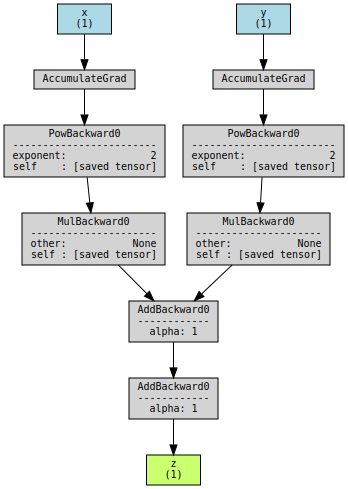

In [ ]:
loss = f_recovered(x, y)
torchviz.make_dot(loss,  params={'x': x, 'y': y, "z": loss}, show_attrs=True)

## Поиск экстремума функции по восстановленному уравнению через перебор

In [ ]:
def f_recovered(x, y):
  global a_coef, b_coef, c_coef
  return a_coef * x ** 2 + b_coef * y ** 2 + c_coef

# Изменение данных для итерирования
loaclity_x = torch.tensor(1, dtype=torch.float64)
locality_y = torch.tensor(1, dtype=torch.float64)
# Инициализируем начальные значения переменных x и y
x_coef = torch.tensor((np.random.rand(1)) * 5, dtype=torch.float64)
y_coef = torch.tensor((np.random.rand(1) - 0.5) * 10, dtype=torch.float64)

print("Начальное значение x: ", x_coef.item(), "Начальное значение y: ", y_coef.item(), " Равен (z): ", f_recovered(x_coef, y_coef).item())

# Задаем параметры оптимизации
learning_rate_1 = torch.tensor(0.025, dtype=torch.float64)
learning_rate_2 = torch.tensor(0.0001, dtype=torch.float64)
learning_rate_3 = torch.tensor(0.0000001, dtype=torch.float64)
epochs = 10000

for iteration in range(epochs):
  if iteration <= epochs // 3:
    learning_rate = learning_rate_1
  elif epochs // 3 < iteration <= epochs // 1.5:
    learning_rate = learning_rate_2
  else:
    learning_rate = learning_rate_3

  sys.stdout.write("\r" + "x: " + str(x_coef.item()) + "  y: " + str(y_coef.item()) + "  lr: " + str(learning_rate.item()) + "  iter: " + str(iteration))

  # Создаём матрицу для дальнейших расчётов
  M = torch.tensor(
    [
      [x_coef + loaclity_x, y_coef,              0],
      [x_coef,              y_coef + locality_y, 0],
      [x_coef - loaclity_x, y_coef,              0],
      [x_coef,              y_coef - locality_y, 0]
    ],
    dtype=torch.float64
  )
  for idx in range(len(M[:, 2])):
    M[idx, 2] = torch.tensor(f_recovered(M[idx, 0].long().item(), M[idx, 1].long().item()))

  # Метод наименьших квадратов
  x = torch.sum(M[:, 0])
  y = torch.sum(M[:, 1])
  z = torch.sum(M[:, 2])
  xx = torch.sum(M[:, 0] * M[:, 0])
  yy = torch.sum(M[:, 1] * M[:, 1])
  xy = torch.sum(M[:, 0] * M[:, 1])
  xz = torch.sum(M[:, 0] * M[:, 2])
  yz = torch.sum(M[:, 1] * M[:, 2])

  # Матрица коэффициентов и вектор правых частей
  a = torch.tensor([[xx, xy, x], [xy, yy, y], [x, y, 4]])
  b = torch.tensor([xz, yz, z])

  # Решение СЛАУ (Метод инвертирования матрицы)
  result = torch.linalg.solve(a, b)

  # Производим расчёт градиента
  x_coef -= (result[0] * learning_rate).item()
  y_coef -= (result[1] * learning_rate).item()

# Выводим значения x1 и x2, которые минимизируют функцию
print("\n\nМинимум функции в точке x: ", x_coef.item(), "Минимум функции в точке y: ", y_coef.item(), " Равен (z): ", f_recovered(x_coef, y_coef).item())

Начальное значение x:  4.6995224586918845 Начальное значение y:  3.458372544800077  Равен (z):  345.1845501382969
x: 1.93691756910687e-07  y: 8.808000649235532e-07  lr: 1e-07  iter: 9999

Минимум функции в точке x:  -7.080824308932128e-08 Минимум функции в точке y:  -8.719993507645093e-08  Равен (z):  -3.1999999999999083


Визуализация функции для анализа

In [ ]:
x = np.linspace(-10, 10, 300)
y = np.linspace(-10, 10, 300)
X, Y = np.meshgrid(x, y)
Z = f_recovered(X, Y)

fig = go.Figure(data=go.Surface(x=X, y=Y, z=Z))

fig.update_layout(
    height=800)
fig.show()

# Задание №3 часть 1

Создать и обосновать модель объекта для постановки экстремального эксперимента и программно реализовать его

Для постановки эксперимента будет использоваться прецептрон с одним скрытым слоем, написанный с помощью PyTorch, а также метод опорных векторов (SVC). Перед этими моделями поставлена задача классификации. С помощью методов scikit-learn будет создаваться "облака" точек в трёхмерном пространстве (облако - это центройда, рядом с которой генерируются точки). Всего будет 4 "облака" точек, у каждой точки будет принадлежность к тому или иному "облаку". Модели должны на основе расположения точек определить к какому "облаку" принадлежит та или иная точка

Было взято две модели, т.к., возможно, одна из этих моделей будет выдавать различные результаты при одинаково настроенных гипер параметрах

Для метода опорных векторов настраевымими параметрами будут: размер выборки для обучения, а также коэффициент регуляризации. Для нейронной сети - размер выборки для обучения и кол-во нейронов в крытом слое

Кол-во точек в выборке может быть $(0; +\infty] \in \mathbb{N}$. Кол-во нейронов в скрытом слое - $(0; +\infty] \in \mathbb{N}$. Коэф-ент регуляризации для SVC - $(0; +\infty] \in \mathbb{R}$




In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

import plotly.express as px

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import sys

## Входные данные для модели, которые мы будем использовать

P.s. они всегда будут генерироваться одинаково при указанном random_state

In [ ]:
x, y = make_blobs(n_samples=1000, random_state=0, n_features=3, centers=4, cluster_std=1.1, shuffle=False)

In [ ]:
fig = px.scatter_3d(
  x=x[:, 0],
  y=x[:, 1],
  z=x[:, 2],
  color=y.astype(str),
  opacity=0.50
)

fig.update_layout(
    height=900)
fig.show()

## PyTorch нейронная сеть

### Построение модели объекта над которым будет ставится эксперимент

Входными данными в функцию эксперемента будут данные о кол-ве точек для генерации и размер скрытого слоя для обучения модели

In [ ]:
# Входные данные для наших вычислений
n_samples = 900
hidden_size = 10

Создаём выборки для обучения и тестирования модели

In [ ]:
x, y = make_blobs(n_samples=n_samples, random_state=0, n_features=3, centers=4, cluster_std=1.1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [ ]:
# Конвертация данных в тензоры PyTorch
x_train = torch.from_numpy(x_train).float()
y_train = torch.from_numpy(y_train).long()
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).long()

Создаём класс модели

In [ ]:
# Определение архитектуры нейронной сети
class NeuralNetwork(nn.Module):
  def __init__(self, input_size=3, hidden_size=5, num_classes=4):
    super(NeuralNetwork, self).__init__()
    # Веса между входным и скрытым слоем сети
    self.linear_1 = nn.Linear(input_size, hidden_size)
    # Веса между скрытым и выходныи слоем сети
    self.linear_2 = nn.Linear(hidden_size, num_classes)
    # Функция активации скрытого слоя
    self.leaky_relu = nn.LeakyReLU()

  def forward(self, x):
    x = self.linear_1(x)
    x = self.leaky_relu(x)
    x = self.linear_2(x)
    return x

Производим подготовку к обучению

In [ ]:
# Параметры для обучения
learning_rate = 0.001
num_epochs = 1000

In [ ]:
# Создание экземпляра модели
model = NeuralNetwork(hidden_size=hidden_size)

In [ ]:
# Определение функции потерь и оптимизатора
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Производим обучение

In [ ]:
# Обучение модели
for epoch in range(num_epochs):
  # Прямой проход (forward)
  outputs = model(x_train)
  loss = loss_function(outputs, y_train)

  # Обратное распространение ошибки (backward) и оптимизация весов
  loss.backward()
  optimizer.step()

  # Обнуление дереве для расчёта градиентов
  optimizer.zero_grad()

  # Вывод промежуточных результатов
  if (epoch+1) % 10 == 0:
    sys.stdout.write("\r" + "Epoch: " + str(epoch) + "  Loss: " + str(loss.item()))

Epoch: 999  Loss: 0.08638755232095718

Оценка качества предсказания модели на тестовых данных

In [ ]:
# Оценка модели на тестовых данных
with torch.no_grad():
  # Расчитываем результат для тестовых входных данных
  outputs = model(x_test)
  # Из полученной матрицы коэфициентов отбираем максимальный для каждой строчки
  _, predicted = torch.max(outputs.data, 1)
  # Расчитываем коэф. правильности ответов
  false_results = 100 - 100 * accuracy
  print(f'Процент неправильных ответов на тестовых данных: {false_results}')

Процент неправильных ответов на тестовых данных: 3.492063492063494


### Упаковка результатов в функцию

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self, input_size=3, hidden_size=5, num_classes=4):
    super(NeuralNetwork, self).__init__()
    # Веса между входным и скрытым слоем сети
    self.linear_1 = nn.Linear(input_size, hidden_size)
    # Веса между скрытым и выходныи слоем сети
    self.linear_2 = nn.Linear(hidden_size, num_classes)
    # Функция активации скрытого слоя
    self.leaky_relu = nn.LeakyReLU()

  def forward(self, x):
    x = self.linear_1(x)
    x = self.leaky_relu(x)
    x = self.linear_2(x)
    return x

def compare_effectivness(n_samples, hidden_size, print_learning_process=False,
                         print_result_on_test_data=False):
  # Создаём данные для обучения (они всегда одинаковые)
  x, y = make_blobs(n_samples=n_samples, random_state=0, n_features=3, centers=4, cluster_std=1.1)
  # Создаём выборки для обучения и тестирования модели
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)
  # Конвертация данных в тензоры PyTorch
  x_train = torch.from_numpy(x_train).float()
  y_train = torch.from_numpy(y_train).long()
  x_test = torch.from_numpy(x_test).float()
  y_test = torch.from_numpy(y_test).long()

  # Параметры для обучения
  learning_rate = 0.001
  num_epochs = 1000

  # Создание экземпляра модели
  model = NeuralNetwork(hidden_size=hidden_size)

  # Определение функции потерь и оптимизатора
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Обучение модели
  for epoch in range(num_epochs):
    # Прямой проход (forward)
    outputs = model(x_train)
    loss = loss_function(outputs, y_train)

    # Обратное распространение ошибки (backward) и оптимизация весов
    loss.backward()
    optimizer.step()

    # Обнуление дереве для расчёта градиентов
    optimizer.zero_grad()

    # Вывод промежуточных результатов
    if (epoch+1) % 10 == 0 and print_learning_process:
      sys.stdout.write("\r" + "Epoch: " + str(epoch) + "  Loss: " + str(loss.item()))

  # Оценка модели на тестовых данных
  with torch.no_grad():
    # Расчитываем результат для тестовых входных данных
    outputs = model(x_test)

    # Из полученной матрицы коэфициентов отбираем максимальный для каждой строчки
    _, predicted = torch.max(outputs.data, 1)

    # Расчитываем коэф. правильности ответов
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    false_results = 100 - 100 * accuracy
    if print_result_on_test_data:
      print(f'\nПроцент неправильных ответов на тестовых данных: {false_results}')

  return false_results

In [ ]:
result = compare_effectivness(
  n_samples,
  hidden_size,
  print_learning_process=True,
  print_result_on_test_data=True
)

Epoch: 999  Loss: 0.08386892080307007
Процент неправильных ответов на тестовых данных: 5.07936507936509


## Scikit-Learn SVM

### Построение модели объекта над которым будет ставится эксперимент

Входными данными в функцию эксперемента будут данные о кол-ве точек для генерации и размер скрытого слоя для обучения модели

In [ ]:
# Входные данные для наших вычислений
n_samples = 900
c_koef = 1

Создаём выборки для обучения и тестирования модели

In [ ]:
x, y = make_blobs(n_samples=n_samples, random_state=0, n_features=3, centers=4, cluster_std=1.1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

Производим создание модели и её обучение

In [ ]:
# Создание экземпляра модели
model = SVC(kernel='rbf', C=c_koef).fit(x_train, y_train)

Оценка качества предсказания модели на тестовых данных

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(f'Процент неправильных ответов на тестовых данных: {100 - 100 * accuracy_score(y_test, y_pred)}')

Процент неправильных ответов на тестовых данных: 3.1746031746031775


### Упаковка результатов в функцию

In [ ]:
def compare_effectivness(n_samples, hidden_size, print_result_on_test_data=False):
  # Создаём данные для обучения (они всегда одинаковые)
  x, y = make_blobs(n_samples=n_samples, random_state=0, n_features=3, centers=4, cluster_std=1.1)
  # Создаём выборки для обучения и тестирования модели
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

  # Создание экземпляра модели
  model = SVC(kernel='rbf', C=c_koef).fit(x_train, y_train)

  y_pred = model.predict(x_test)

  # Расчитываем коэф. правильности ответов
  false_results = 100 - 100 * accuracy_score(y_test, y_pred)
  if print_result_on_test_data:
    print(f'Процент неправильных ответов на тестовых данных: {false_results}')

  return false_results

In [ ]:
result = compare_effectivness(
  n_samples,
  hidden_size,
  print_result_on_test_data=True
)

Процент неправильных ответов на тестовых данных: 3.1746031746031775


# Задание №3 часть 2

Программно реализовать метод планирования экстремального эксперимента для выбранной модели

На основе ранее проведённых работ мы создадим последовательность на с помощью которой можно находить оптимальные значения для прецептрона PyTorch или SVС. Гиперпараметрами для оптимизации будут: кол-во течек данных для обучения (прецептрон и SVC), коэф-ент регуляризации (SVC), кол-во нейронов в скрытом слое (прецептрон)

Алгоритм для проведение эксперемента немного изменился. Изначальные значения для апроксимации будут задаваться пользователем, а не рандомно. А также будут задаваться значения для шага переменных в матрице. Матрица задаётся не случайным образом, а при помощи комбинации начальных значений и где это надо прибавкой или обавкой шага для переменной. Создание матрицы, расчёт матрицы и вектора для наименьших квадратов, решение СЛАУ, а так-же оптимизация параметров с помощью градиента будет производится в цикле. К несчастью встроеннуые методы PyTorch для построения графа дифференцирования здесь не получилось имплементировать

В результате работы алгоритм выдаст лучшие значения гиперпараметров для обучения модели (прецептрона PyTorch или SVC)

In [ ]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

import plotly.express as px

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import sys

## PyTorch нейронная сеть

Создаём нашу модель, с которой мы будем проводить исследование

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self, input_size=3, hidden_size=5, num_classes=4):
    super(NeuralNetwork, self).__init__()
    # Веса между входным и скрытым слоем сети
    self.linear_1 = nn.Linear(input_size, hidden_size)
    # Веса между скрытым и выходныи слоем сети
    self.linear_2 = nn.Linear(hidden_size, num_classes)
    # Функция активации скрытого слоя
    self.leaky_relu = nn.LeakyReLU()

  def forward(self, x):
    x = self.linear_1(x)
    x = self.leaky_relu(x)
    x = self.linear_2(x)
    return x

def compare_effectivness(n_samples, hidden_size, print_learning_process=False,
                         print_result_on_test_data=False):
  # Создаём данные для обучения (они всегда одинаковые)
  x, y = make_blobs(n_samples=n_samples, random_state=0, n_features=3, centers=4, cluster_std=1.1)
  # Создаём выборки для обучения и тестирования модели
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)
  # Конвертация данных в тензоры PyTorch
  x_train = torch.from_numpy(x_train).float()
  y_train = torch.from_numpy(y_train).long()
  x_test = torch.from_numpy(x_test).float()
  y_test = torch.from_numpy(y_test).long()

  # Параметры для обучения
  learning_rate = 0.001
  num_epochs = 500

  # Создание экземпляра модели
  model = NeuralNetwork(hidden_size=hidden_size)

  # Определение функции потерь и оптимизатора
  loss_function = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

  # Обучение модели
  for epoch in range(num_epochs):
    # Прямой проход (forward)
    outputs = model(x_train)
    loss = loss_function(outputs, y_train)

    # Обратное распространение ошибки (backward) и оптимизация весов
    loss.backward()
    optimizer.step()

    # Обнуление дереве для расчёта градиентов
    optimizer.zero_grad()

    # Вывод промежуточных результатов
    if (epoch+1) % 10 == 0 and print_learning_process:
      sys.stdout.write("\r" + "Epoch: " + str(epoch) + "  Loss: " + str(loss.item()))

  # Оценка модели на тестовых данных
  with torch.no_grad():
    # Расчитываем результат для тестовых входных данных
    outputs = model(x_test)

    # Из полученной матрицы коэфициентов отбираем максимальный для каждой строчки
    _, predicted = torch.max(outputs.data, 1)

    # Расчитываем коэф. правильности ответов
    accuracy = (predicted == y_test).sum().item() / y_test.size(0)
    false_results = 100 - 100 * accuracy
    if print_result_on_test_data:
      print(f'\nПроцент неправильных ответов на тестовых данных: {false_results}')

  return false_results

Разрабатываем скрипт для проведение эксперимента

In [ ]:
def f(x, y):
  return compare_effectivness(x, y)

# Задаём изначальные значения для проведения расчётов
x_coef = 1000
y_coef = 30
loaclity_x = 50
locality_y = 5

# Задаем параметры оптимизации
learning_rate_1 = torch.tensor(50, dtype=torch.float64)
learning_rate_2 = torch.tensor(5, dtype=torch.float64)
learning_rate_3 = torch.tensor(0.5, dtype=torch.float64)
epochs = 50

for iteration in range(epochs):
  if iteration <= epochs // 3:
    learning_rate = learning_rate_1
  elif epochs // 3 < iteration <= epochs // 1.5:
    learning_rate = learning_rate_2
  else:
    learning_rate = learning_rate_3

  sys.stdout.write("\r" + "x: " + str(x_coef) + "  y: " + str(y_coef) + "  lr: " + str(learning_rate.item()) + "  iter: " + str(iteration))

  # Создаём матрицу для дальнейших расчётов
  M = torch.tensor(
    [
      [x_coef + loaclity_x, y_coef,              0],
      [x_coef,              y_coef + locality_y, 0],
      [x_coef - loaclity_x, y_coef,              0],
      [x_coef,              y_coef - locality_y, 0]
    ],
    dtype=torch.float64
  )
  for idx in range(len(M[:, 2])):
    M[idx, 2] = torch.tensor(f(M[idx, 0].long().item(), M[idx, 1].long().item()))

  # Метод наименьших квадратов
  x = torch.sum(M[:, 0])
  y = torch.sum(M[:, 1])
  z = torch.sum(M[:, 2])
  xx = torch.sum(M[:, 0] * M[:, 0])
  yy = torch.sum(M[:, 1] * M[:, 1])
  xy = torch.sum(M[:, 0] * M[:, 1])
  xz = torch.sum(M[:, 0] * M[:, 2])
  yz = torch.sum(M[:, 1] * M[:, 2])

  # Матрица коэффициентов и вектор правых частей
  a = torch.tensor([[xx, xy, x], [xy, yy, y], [x, y, 4]])
  b = torch.tensor([xz, yz, z])

  # Решение СЛАУ (Метод инвертирования матрицы)
  result = torch.linalg.solve(a, b)

  # Получаем коэфициенты
  a_coef = result[0]
  b_coef = result[1]
  #c_coef = result[2] Не потребуется

  # Производим расчёт градиента
  x_coef -= (a_coef * learning_rate).item()
  y_coef -= (b_coef * learning_rate).item()


print(f"\nРезультат: x = {x_coef}, y = {y_coef}, res = {f(int(x_coef), int(y_coef))}")

x: 1002.1054560387133  y: 30.655269134044715  lr: 0.5  iter: 49
Результат: x = 1002.1018818855284, y = 30.641024124622415, res = 3.7037037037037095


## Scikit-Learn SVM

In [ ]:
def compare_effectivness(n_samples, hidden_size, print_result_on_test_data=False):
  # Создаём данные для обучения (они всегда одинаковые)
  x, y = make_blobs(n_samples=n_samples, random_state=0, n_features=3, centers=4, cluster_std=1.1)
  # Создаём выборки для обучения и тестирования модели
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

  # Создание экземпляра модели
  model = SVC(kernel='rbf', C=c_koef).fit(x_train, y_train)

  y_pred = model.predict(x_test)

  # Расчитываем коэф. правильности ответов
  false_results = 100 - 100 * accuracy_score(y_test, y_pred)
  if print_result_on_test_data:
    print(f'Процент неправильных ответов на тестовых данных: {false_results}')

  return false_results

Разрабатываем скрипт для проведение эксперимента

In [ ]:
def f(x, y):
  return compare_effectivness(x, y)

# Задаём изначальные значения для проведения расчётов
x_coef = 100
y_coef = 3
loaclity_x = 5
locality_y = 1

# Задаем параметры оптимизации
learning_rate_1 = torch.tensor(100, dtype=torch.float64)
learning_rate_2 = torch.tensor(10, dtype=torch.float64)
learning_rate_3 = torch.tensor(1, dtype=torch.float64)
epochs = 10000

for iteration in range(epochs):
  if iteration <= epochs // 3:
    learning_rate = learning_rate_1
  elif epochs // 3 < iteration <= epochs // 1.5:
    learning_rate = learning_rate_2
  else:
    learning_rate = learning_rate_3

  sys.stdout.write("\r" + "x: " + str(x_coef) + "  y: " + str(y_coef) + "  lr: " + str(learning_rate.item()) + "  iter: " + str(iteration))

  # Создаём матрицу для дальнейших расчётов
  M = torch.tensor(
    [
      [x_coef + loaclity_x, y_coef,              0],
      [x_coef,              y_coef + locality_y, 0],
      [x_coef - loaclity_x, y_coef,              0],
      [x_coef,              y_coef - locality_y, 0]
    ],
    dtype=torch.float64
  )
  for idx in range(len(M[:, 2])):
    M[idx, 2] = torch.tensor(f(M[idx, 0].long().item(), M[idx, 1].long().item()))

  # Метод наименьших квадратов
  x = torch.sum(M[:, 0])
  y = torch.sum(M[:, 1])
  z = torch.sum(M[:, 2])
  xx = torch.sum(M[:, 0] * M[:, 0])
  yy = torch.sum(M[:, 1] * M[:, 1])
  xy = torch.sum(M[:, 0] * M[:, 1])
  xz = torch.sum(M[:, 0] * M[:, 2])
  yz = torch.sum(M[:, 1] * M[:, 2])

  # Матрица коэффициентов и вектор правых частей
  a = torch.tensor([[xx, xy, x], [xy, yy, y], [x, y, 4]])
  b = torch.tensor([xz, yz, z])

  # Решение СЛАУ (Метод инвертирования матрицы)
  result = torch.linalg.solve(a, b)

  # Получаем коэфициенты
  a_coef = result[0]
  b_coef = result[1]
  #c_coef = result[2] Не потребуется

  # Производим расчёт градиента
  x_coef -= (a_coef * learning_rate).item()
  y_coef -= (b_coef * learning_rate).item()


print(f"\nРезультат: x = {x_coef}, y = {y_coef}, res = {f(int(x_coef), int(y_coef))}")

x: 529.8427731389858  y: 3.0000000001036105  lr: 1.0  iter: 9999
Результат: x = 529.954956352192, y = 3.000000000103619, res = 1.6129032258064484


# Задание №4

Оценить адекватность аппроксимирующей модели поферхности отклика с помощью A/B тестирования (F-тест, T-тест)

Для данной задачи была взята только модель SVC. Прецептрон на PyTorch имел слишком большой разброс результатов обучения на одних и тех же гиперпаметрах. По этому Прецептрон на PyTorch не оценивался здесь

Для проверки подобранных в прошлый раз оптимальных гиперпараметров для модели мы будем создавать данные случайным образом и будем анализировать как справилась модель. После проверки с помощью перебора гиперпараметров мы создадим новую модель, которая покажет насколько были оптимальны гиперпараметры подобраны с помощью реализованной ранее кода

Для эксперемента возьмём ранее полученные гиперпараметры для модели и проведём 100 эксперементов

In [ ]:
import numpy as np

import pandas as pd

import plotly.express as px

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

import scipy

import sys

Задание самых оптимальных гиперпараметров для SVC, полученных в прошлом задании

In [ ]:
x_coef = int(round(529.954956352192, 0))
y_coef = float(round(3.000000000103619, 0))

Создаё массив семян для генератора рандомных значений. Для проверки модели

In [ ]:
rand_seeds = np.random.randint(1, 1000, (100))

Как говорилось ранее функция для аппроксимации гиперпарметров была изменена. В ней был создан подбор лучших параметров с помощью перебора

In [ ]:
def compare_effectivness(n_samples, hidden_size, random_state):
  # Расчёт результатов для модели с аппроксимированными гиперпараметрами

  # Создаём данные для обучения (они всегда одинаковые)
  x, y = make_blobs(n_samples=n_samples, random_state=random_state, n_features=3, centers=4, cluster_std=1.1)
  # Создаём выборки для обучения и тестирования модели
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)
  # Создание экземпляра модели и обучаем её
  model = SVC(kernel='rbf', C=c_koef).fit(x_train, y_train)
  y_pred = model.predict(x_test)
  # Расчитываем коэф. правильности ответов
  false_results_chosen = 100 - 100 * accuracy_score(y_test, y_pred)

  # Расчёт результатов с помощью алгоритма для автоматического подбора оптимальных гиперпараметров

  # Создаём сетку в прострастве которой мы будем искать С
  c_vars = np.arange(0.1, 5, 0.1)
  grid = {"C": c_vars}
  # Инициальзируем поиск и запускаем его
  cv_searcher = RandomizedSearchCV(SVC(kernel='rbf'), grid)
  cv_searcher.fit(x_train, y_train)
  # Отбираем лучший парамтер C
  c_best = cv_searcher.best_params_['C']
  # Создание экземпляра модели и обучаем её
  model = SVC(kernel='linear', C=c_best).fit(x_train, y_train)
  y_pred = model.predict(x_test)
  # Расчитываем коэф. правильности ответов
  false_results_cv = 100 - 100 * accuracy_score(y_test, y_pred)

  return [false_results_chosen, false_results_cv]

In [ ]:
results = []

for i in range(100):
  results += [compare_effectivness(x_coef, y_coef, rand_seeds[i])]

results = pd.DataFrame(results, columns=["Аппроксимированный гипперпарамтеры", "Подобранные гипперпараметры"])
results

Аппроксимированный гипперпарамтеры  Подобранные гипперпараметры
0                             0.000000                     0.000000
1                             0.000000                     0.000000
2                             0.000000                     0.000000
3                             0.000000                     0.000000
4                             0.000000                     0.000000
..                                 ...                          ...
95                            0.000000                     0.000000
96                            0.000000                     0.000000
97                            0.000000                     0.000000
98                            1.612903                     2.150538
99                            0.000000                     0.537634

[100 rows x 2 columns]

Производим тестирование

F-тест проверяет одинаковы ли дисперсии двух выборок. Нулевой гипотезой будет то, что дисперсии двух выборок одинаковы. Альтернативной гипотезой будет то, что дисперсия двух выборок не одинакова

$$H_{0}: σ_{1} = σ_{2} \tag{дисперсия выборок одинаковая}$$

$$H_{1}: σ_{1} ≠ σ_{2} \tag{дисперсия выборок разная}$$

In [ ]:
def f_test(x, y):
  #calculate F test statistic
  f = np.var(x, ddof=1) / np.var(y, ddof=1)
  #define degrees of freedom numerator
  dfn = x.size-1
  #define degrees of freedom denominator
  dfd = y.size-1
  #find p-value of F test statistic
  p = 1 - scipy.stats.f.cdf(f, dfn, dfd)
  return f, p

f_test(results.iloc[:, 0].values, results.iloc[:, 1].values)

(0.9649348619072441, 0.5702953867571684)

В результате получим, что P-value > 0.05. По этому мы не можем отменить нулевую гипотезу (P-value - это второе значение)

T-тест проверяет одинаковы ли средние значения двух выборок. Нулевой гипотезой будет то, что средние значения двух выборок одинаковы. Альтернативной гипотезой будет то, что средние значения двух выборок не одинакова

$$H_{0}: \overline{x_{1}} = \overline{x_{2}} \tag{среднее значение выборок одинаковое}$$

$$H_{1}: \overline{x_{1}} ≠ \overline{x_{2}} \tag{среднее значение выборок разное}$$

In [ ]:
scipy.stats.ttest_ind(a=results.iloc[:, 0].values, b=results.iloc[:, 1].values, equal_var=True)

TtestResult(statistic=-0.21064414070017062, pvalue=0.8333815860078463, df=198.0)

В результате получим, что P-value > 0.05. По этому мы не можем отменить нулевую гипотезу